In [ ]:
"""
    Check the BBarolo spectral fit against my model and my data.
    
    Plot v16 and v84
"""

In [1]:
import numpy as np

from astropy.io import fits
import matplotlib.pyplot as plt
%matplotlib inline

from dictionaryThings import loadDict
from ObsInfo import ObsInfo

In [2]:
out = 'out0'
arcsec = '3arc'
topPath = '/Volumes/QbertPrimary/umdResearch/adapProposalNearby/'



# Dictionary of galaxy properties
objDictName = topPath+'objectInfoDict.pkl'
# Dictionary of emission line properties.
lineDict = loadDict(topPath+'emiLineDict.pkl')
# Text file of line fitting parameters.
paramFileName = topPath + 'fittingParametersV4.txt'


# Red in parameter file
paramFileData = np.genfromtxt(paramFileName, dtype=None, autostrip=True,
                              names=True, encoding=None)

for x in range(len(paramFileData)):
    obsInfo = ObsInfo(x, paramFileName, objDictName)
    
    # Name of the emission line.
    lineName = paramFileData['lineNameShort'][x]
    # Rest wavelength of the emission line.
    restWave = lineDict[lineName]['restWave']
    sysWave = (1.+obsInfo.z)*restWave
    # Spatial resolution at line wavelength
    spatRes = lineDict[lineName]['spatRes']


    # Base for the object's file names.
    objectNameBase = (str(obsInfo.obsId)+'_'+obsInfo.objectName
                      +'_'+lineName)
    
    # Base path to the object's folders.
    objectPathBase = (topPath+'pySpecKitCube/run4/'+obsInfo.objectName
                          +'/'+arcsec+'/3dBarolo/')

    dataFile = (topPath+'pySpecKitCube/run4/'+obsInfo.objectName+'/'
                +arcsec+'/outFitsFiles/'+objectNameBase+'.fits')
    barFile = (topPath+'pySpecKitCube/run4/'+obsInfo.objectName+'/'
                  +arcsec+'/3dBarolo/'+lineName+'/'+out+'/'
                  +obsInfo.objectName+'mod_local.fits')
    
    dataHdu = fits.open(dataFile)
    barHdu = fits.open(barFile)
    
    vels = dataHdu['zCorrVels'].data
    
    data = dataHdu['contSubFluxes'].data
    dataModel = dataHdu['modTotalFluxes'].data
    barModel = barHdu[0].data
    
    break
    
    


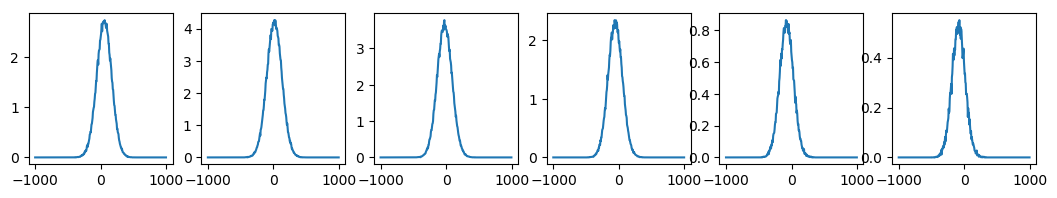

In [13]:
col,row = 12,13

cols = [10,12,14,16,18,20]

fig = plt.figure(facecolor='white',dpi=100,figsize=(13,2))
for i in xrange(len(cols)):
    ax = fig.add_subplot(1,len(cols),i+1)
    
    #ax.plot(vels,data[:,cols[i],row],label='data')
    #ax.plot(vels,dataModel[:,cols[i],row],label='dataModel')
    ax.plot(vels,barModel[:,cols[i],row])

In [8]:
dataHdu.info()

Filename: /Volumes/QbertPrimary/umdResearch/adapProposalNearby/pySpecKitCube/run4/circinus/3arc/outFitsFiles/1342191297_circinus_oiii88.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     363   ()      
  1  image         1 ImageHDU        70   (24, 24, 573)   float64   
  2  error         1 ImageHDU        70   (24, 24, 573)   float64   
  3  wcs-tab       1 BinTableHDU     37   1R x 2C   [573D, 573J]   
  4  flag          1 ImageHDU        58   (24, 24, 573)   int16   
  5  History       1 ImageHDU        23   ()      
  6  HistoryScript    1 BinTableHDU     44   76R x 1C   [187A]   
  7  HistoryTasks    1 BinTableHDU     46   45R x 4C   [1K, 31A, 1K, 9A]   
  8  HistoryParameters    1 BinTableHDU     74   451R x 10C   [1K, 27A, 13A, 20A, 1L, 1K, 1L, 58A, 11A, 42A]   
  9  flux          1 ImageHDU         8   (24, 24)   float64   
 10  wAsym         1 ImageHDU         8   (24, 24)   float64   
 11  w1            1 ImageHDU         8 

In [12]:
from maskThings import maskTrue
from pixelThings import findValidPixels

nFluxes,nCols,nRows = data.shape

trueMask = maskTrue(data=data)

validPixels = findValidPixels((nCols,nRows),trueMask['mask'][0,:,:])

In [ ]:
data=None,
contFlux=None,
maskedData=None,
xarr=None,
gauss1=None,
gauss2=None,
gauss3=None,
gauss4=None,
validPixels=None

In [ ]:
    fig = plt.figure(figsize=(8, 8))

    ## Get the number of fluxes, columns, and rows in the data cube.
    npar = data.shape[0]
    ncol = data.shape[1]
    nrow = data.shape[2]


    ## Create a [nrow X ncol] plot grid with no
    ## space between subplots.
    ## Gridspec index starts at 1 instead of 0.
    gs = gridspec.GridSpec(nrow+1, ncol+1, wspace=0.0, hspace=0.0)

    ## Get the indices of the min/max velocities.
    minIdx = (np.abs(xarr - (velMin))).argmin()
    maxIdx = (np.abs(xarr - (velMax))).argmin()

    ## The OH doesn't need to be cropped for some reason.
    if dontCrop != None:
        velArr=xarr
        velRange=np.arange(velMin,velMax,2)
    else:
        ## Crop the edges of the spectrum which are excluded from all fitting.
        velArr = xarr#[int(minIdx):int(maxIdx)]
        velRange = np.arange(velMin,velMax,1)

    for ii in range(nrow):
        for jj in range(ncol):
            if (jj,ii) in validPixels:
                ax = plt.subplot(gs[ii, jj]) # Location of the subplot on the grid.

                ## Plot the spectrum (either subtracted or not).
                if dontCrop != None:
                    ax.plot(velArr, data[:,jj,ii], color='black',
                        linewidth=0.4, alpha=.8, drawstyle='steps-mid')
                else:
                    # ax.plot(velArr, data[minIdx:maxIdx,jj,ii], color='black',
                    #     linewidth=0.4, alpha=.8, drawstyle='steps-mid')
                    ax.plot(velArr, data[:,jj,ii], color='black',
                        linewidth=0.4, alpha=.8, drawstyle='steps-mid')

                if gauss1 is not None:
                    ## Plot the fitted gaussians
                    ax.plot(velArr, gauss1[:,jj,ii],color='blue',
                            linewidth=0.2,alpha=.7)
                    ax.plot(velArr, gauss2[:,jj,ii],color='blue',
                            linewidth=0.2,alpha=.7)

                    if nComps ==3:
                      ax.plot(velArr, gauss3[:,jj,ii],color='blue',
                              linewidth=0.2,alpha=.7)

                      ax.plot(velArr,gauss1[:,jj,ii]+\
                            gauss2[:,jj,ii]+\
                            gauss3[:,jj,ii],
                            color='magenta',
                            linewidth=0.2,alpha=.5)

                    if nComps ==4:
                      ax.plot(velArr, gauss3[:,jj,ii],color='blue',
                              linewidth=0.2,alpha=.7)

                      ax.plot(velArr, gauss4[:,jj,ii],color='blue',
                              linewidth=0.2,alpha=.7)

                      ax.plot(velArr,gauss1[:,jj,ii]+\
                            gauss2[:,jj,ii]+\
                            gauss3[:,jj,ii]+\
                            gauss4[:,jj,ii],
                            color='magenta',
                            linewidth=0.2,alpha=.5)


                    else:
                      ax.plot(velArr,gauss1[:,jj,ii]+\
                              gauss2[:,jj,ii],
                              color='magenta',
                              linewidth=0.2,alpha=.5)

                ## Mark the measured velocities with a vertical line.
                if v50 is not None:
                    ax.axvline(v50[jj,ii],linewidth=0.2,color='green',
                               linestyle='dotted',alpha=0.5)

                if v16 is not None:
                    ax.axvline(v16[jj,ii],linewidth=0.2,color='red',
                               linestyle='dotted',alpha=0.5)
                    ax.axvline(v84[jj,ii],linewidth=0.2,color='red',
                               linestyle='dotted',alpha=0.5)

                ## Plot the fitted continuum
                if contFlux is not None:
                    ax.plot(velArr,maskedData[:,jj,ii],
                            color='magenta',linewidth=0.2)
                    ax.plot(velArr,contFlux[:,jj,ii],
                            linestyle='dashed', color='blue',linewidth=0.2)


                ## Hide the tick marks
                ax.set_xticks([])
                ax.set_yticks([])

                ax.set_xlim([velMin,velMax])

                ## Mark velocity = 0.
                ax.axvline(0, color='grey', linewidth=0.3, alpha=0.6)

                ## Label the [spaxCol x spaxRow]. The [col x row] convention for the
                ## data cube is opposite the [row x col] convention of gridspec.
                ax.annotate(str(jj) + 'x' + str(ii), (0.6,0.8), xycoords='axes fraction',
                            color='black', fontsize=2)



    ## Show ticks only on the outside spines
    allAxes = fig.get_axes()

    for ax in allAxes:
        for sp in ax.spines.values():
            sp.set_visible(False)
        if ax.is_first_row():
            ax.spines['top'].set_visible(True)
        if ax.is_last_row():
            ax.spines['bottom'].set_visible(True)
        if ax.is_first_col():
            ax.spines['left'].set_visible(True)
        if ax.is_last_col():
            ax.spines['right'].set_visible(True)